
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E05_KNN.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# K-Nearest Neighbor classification (KNN) exercises 

---
These are introductory exercises in Machine learning with focus in **KNN**, but also an introductory exercise in computer vision.

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 0. MNIST data (*)

In the whole exercise, we will work with the famous MNIST dataset. Start by installing ```tensorflow``` to your pipenv if you haven't already. Import ```keras``` from tensorflow and load the dataset using ```keras.mnist.load_data()```.

&nbsp; a) Check help() on ```keras.datasets.mnist.load_data``` and read to find out how to unpack the data properly. 

&nbsp; b) Check the shapes of X_train, X_test, y_train, y_test. What does each dimension mean?

&nbsp; c) How many images are there in X_train?

&nbsp; d) Check smallest and largest value of a sample image of your choice. What do these numbers in the matrix represent? Plot this image using ```plt.imshow()``` and set cmap to "gray" to get the correct representation of the grayscale image.

&nbsp; e) Plot 20 sample images. 

&nbsp; f) When you checked the shapes of the data you noticed that X_train, X_test are 3D tensors (generalization of a matrix to more dimensions). However KNN classifier in scikit-learn requires a 2D tensor or a matrix. Reshape X_train and X_test to appropriate shapes. 

<details>

<summary>Hint</summary>

e) A vector or a 1D array can represent one image. 

</details>

<details>

<summary>Answer</summary>

d) 0 and 255. It's grayscale images of 28x28 pixels, where the higher the value, the larger pixel intensity.

<img src = "../assets/MNIST_samples.png" height=100>

e) Shape: X_train: (60000, 784), X_test: (10000, 784)

</details>

---

In [2]:
# a)
# help(keras.datasets.mnist.load_data())

In [3]:
# b)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, X_train.shape, y_train.shape, y_train.shape

# 60000 bilder, alla med 28x28 pixlar

((60000, 28, 28), (60000, 28, 28), (60000,), (60000,))

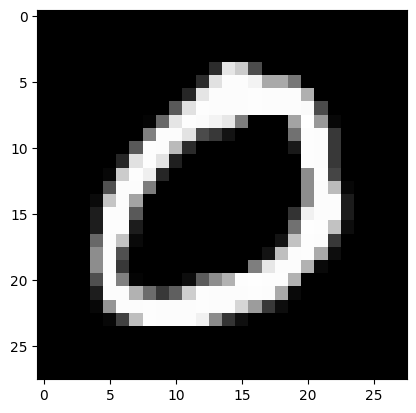

In [4]:
# d)
sample = X_train[np.random.randint(0, X_train.shape[0])]
plt.imshow(sample, cmap='gray')

<Axes: >

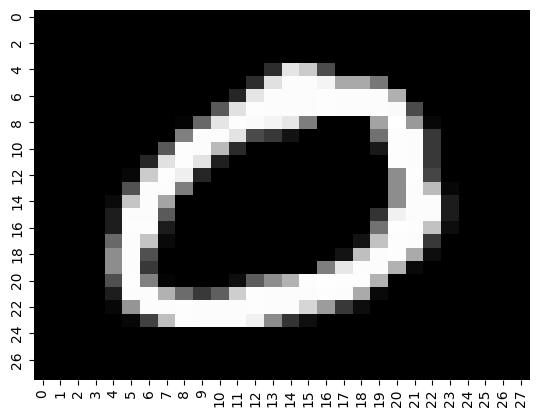

In [5]:
# Matrisen visar varje värde från 0-255 där 0 är svart och 255 är vitt.
sns.heatmap(sample, cmap='gray', cbar=False)

## 1. Train|test|validation split (*)

As you already have training data and testing data, do a split on the training data to get validation data. The validation data will be used for tuning $k$ number of neighbors for KNN. I used 0.16 for validation as it is close to 1/6 to get around 10000 validation samples.

---

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.16)

print(X_train.shape, X_valid.shape, X_test.shape)

(42336, 28, 28) (8064, 28, 28) (10000, 28, 28)


## 2. Hyperparameter tuning (*)

Train the models for a set of $k$-values using the training data and make predictions on validation data. Plot the validation accuracy against different $k$-values. Based on your plot, which $k$ do you choose? 

<details>

<summary>Answer</summary>

<img src = "../assets/Tune k in KNN MNIST.png" height=300>

</details>

---

## 3. Train and predict (*)

Now train the KNN model using the $k$ value you have chosen. Don't waste any training samples, so use all the original 60000 of the X_train for training the KNN model. Predict on the test data. 

&nbsp; a) Do a classification report and based on the report, can you figure out which number had highest proportions of false negatives. False negative in this case means that the true label is $i$ but the model predicted not $i$.  

&nbsp; b) Plot a confusion matrix, does this confirm your answer in a?

&nbsp; c) Compute the number of misclassifications for each number. Which number had most misclassifications, do you have any suggestions on why this would be the case?

<details>

<summary>Answer</summary>

c) 

Total test sample consist of 10000 digits

True label 0, algorithm misclassified 7 of those

True label 1, algorithm misclassified 6 of those

True label 2, algorithm misclassified 40 of those

True label 3, algorithm misclassified 40 of those

True label 4, algorithm misclassified 38 of those

True label 5, algorithm misclassified 32 of those

True label 6, algorithm misclassified 14 of those

True label 7, algorithm misclassified 36 of those

True label 8, algorithm misclassified 54 of those

True label 9, algorithm misclassified 42 of those

</details>

---
## 4. Predict your own handwriting (**)

Use a software of your choice to draw a digit, make sure the image size is 28x28 pixels or you have to downscale it. You could also take a photo of a handwritten image, if you scale it properly. Read your image using ```matplotlib.image.imread()```. You will have to convert it into grayscale and scale it to be in same scale as the dataset your model has been trained on. Predict on your digit, was it correct? If not, what could the reason be, and is there something that could be done on preprocessing your image? 

---
## 5. Make an application for drawing handwritten numbers (***)

Now you would want a user to draw directly on an application and afterwards the app will predict which number that the user drew. Try and explore if you could use [dash-canvas](https://dash.plotly.com/canvas) for this task. Design this app and use dash bootstrap component and/or own CSS to make it into a flashy handwriting detection application. Deploy your application and put it into your portfolio.


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---